#This is the Exploratory Data Analysis (EDA) notebook for my Capstone 2 project where I build a model that will correctly identify which customers will churn (these customers are identified by 'Yes' in the Churn column). I take the Telco data set which I cleaned in the Capstone2_cleaningdata notebook and perform EDA on it along with some pre-processing. At the end of this notebook, I create a data set that will be ready to plug into the different models I will be using in all of my subsequent notebooks.



##First, I load the Python packages. Then I create 3 DataFrames. All of the data for all of the customers will be contained in the DataFrame (df). The other two DataFrames contain the data on the customers who churned (df_churn) and the data on the customers who stayed (df_stay).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_url = 'https://raw.githubusercontent.com/eolson615/SpringboardDSCareerTrack/master/Capstone2/Data/telcodata_clean.csv'
df = pd.read_csv(df_url, index_col=[0])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_churn = df[df['Churn'] == 'Yes']
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [4]:
df_stay = df[df['Churn'] == 'No']
df_stay.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


##Below are the summary stats tables for the numeric data of df, df_churn, and df_stay. 

##We see some interesting trends already. At least half of the customers who leave do so within the first 10 months of joining with the company. Churn customers also seem to be paying a little bit more per month.

In [5]:
print('Summary table for all customers'),
print(df.describe()),
print('\n')
print('Summary table for customers who left'),
print(df_churn.describe()),
print('\n')
print('Summary table for customers who stayed')
print(df_stay.describe())

Summary table for all customers
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


Summary table for customers who left
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    1869.000000  1869.000000     1869.000000   1869.000000
mean        0.254682    17.979133       74.441332   1531.796094
std         0.435799    19.531123       24.666053   1890.822994
min         0.000000     1.000000       18.850000     18.850000
25%         0.000000     2.000000

##Below are histograms and boxplots comparing the numeric features of the customers who stayed with Telco (df_stay) with that of the customers who left Telco (df_churn).

##In the first histogram and boxplot pair, which looks at how long a customer has been with Telco, I notice that in the first year almost half of Telco's new customers end up leaving during that year. Another side of the same story, of all the customers who left, over half of those did so in the first 12 months of being a customer with Telco. This is such a prominent trend that I dedicate a separate notebook, Capstone2_year1model, which explores this phenomenon more in-depth to see if any additional insight can be gained by looking at just the first year customers. 

##In the second histogram and boxplot pair, I see that the churn customers and the stay customers follow roughly the same distribution in terms of what they were paying a month, except for the giant grouping of stay customers, and the lack of churn customers, in the lower price column. Those stay customers help create a much larger middle 25-75 quartile range in the boxplot compared to the churn customers boxplot.

##In the third histogram, which looks at the total amount a customer paid over the course of their time with Telco, the distribution curve of the stay customers and the churn customers is roughly the same. This is interesting considering that the data for this histogram is a combination of the data from the previous two histograms (the amount charged per month & the total time a customer has been with Telco) and that the first two histograms had some differences between the stay customer and the churn customers. This would seem to indicate that the customers who are sticking around longer are the ones who are paying less per month. Another interesting group of customers to explore more are those in the (\$8,000-\$9,000) column, where there appears to be no churn customers. But both of those insights (the stay customers who do not pay a lot over the time they have been with Telco and the stay customers who have a customer life total payment of over $8,000) are outside the scope of this project but could potentially provide some fruitful insight for Telco.

In [9]:
from google.colab import files
images_dir = '/content/drive/My Drive/Colab Notebooks/Capstone2'

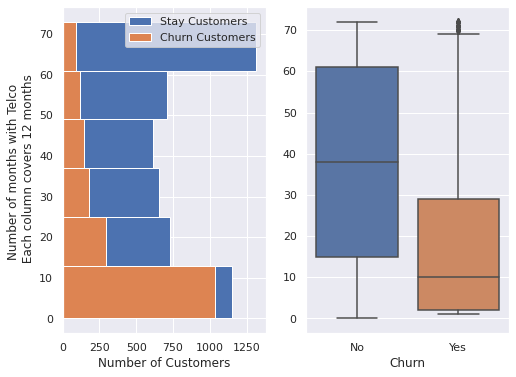

FileNotFoundError: ignored

In [11]:
bins_edges = [0, 13, 25, 37, 49, 61, 73]  #this was done to represent the number of years, as tenure's units is in months
f, (ax_hist, ax_box) = plt.subplots(ncols=2, figsize=(8, 6))

ax_hist.hist(df_stay['tenure'], bins= bins_edges, orientation='horizontal', label='Stay Customers')
ax_hist.hist(df_churn['tenure'], bins= bins_edges, orientation='horizontal', label='Churn Customers')
ax_hist.set(xlabel='Number of Customers', ylabel='Number of months with Telco \n Each column covers 12 months')
ax_hist.legend()

sns.boxplot(x='Churn', y='tenure', data=df, ax=ax_box)
ax_box.set(xlabel='Churn', ylabel='')


plt.savefig(f"{images_dir}/tenure_of_customers.png")
plt.show()
files.download('tenure_of_customers.png')

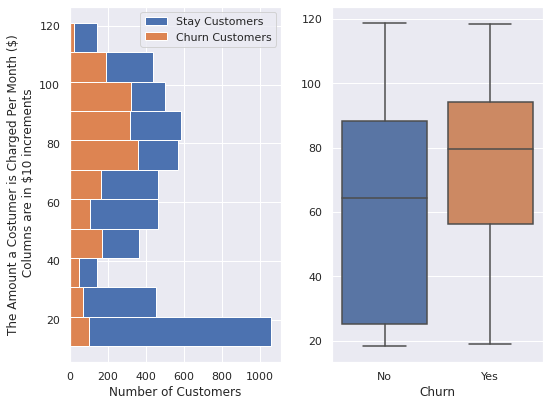

In [ ]:
bins_edges = [11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121] 
f, (ax_hist, ax_box) = plt.subplots(ncols=2, figsize=(8, 6))

ax_hist.hist(df_stay['MonthlyCharges'], bins= bins_edges, orientation='horizontal', label='Stay Customers', stacked=True)
ax_hist.hist(df_churn['MonthlyCharges'], bins= bins_edges, orientation='horizontal', label='Churn Customers', stacked=True)
ax_hist.set(xlabel='Number of Customers', ylabel='The Amount a Costumer is Charged Per Month ($)\n Columns are in $10 increments')
ax_hist.legend()

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=ax_box)
ax_box.set(xlabel='Churn', ylabel='')

plt.tight_layout(pad=2.0)


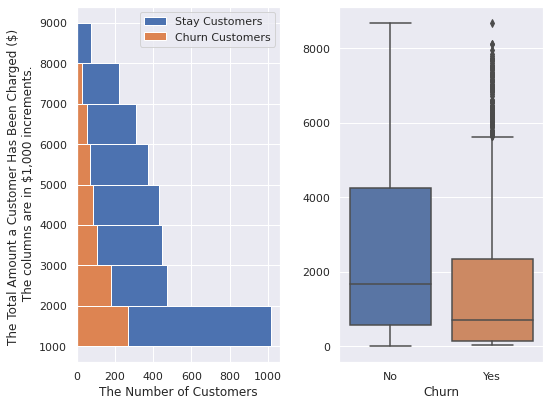

In [ ]:
bins_edges = [1001, 2001, 3001, 4001, 5001, 6001, 7001, 8001, 9001]
f, (ax_hist, ax_box) = plt.subplots(ncols=2, figsize=(8, 6))

ax_hist.hist(df_stay['TotalCharges'], bins=bins_edges, orientation='horizontal', label='Stay Customers')
ax_hist.hist(df_churn['TotalCharges'], bins=bins_edges, orientation='horizontal', label='Churn Customers')
ax_hist.set(xlabel='The Number of Customers', ylabel='The Total Amount a Customer Has Been Charged ($) \n The columns are in $1,000 increments.')
ax_hist.legend()

sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=ax_box)
ax_box.set(xlabel='Churn', ylabel='')

plt.tight_layout(pad=2.0)
plt.show()

##Next, I compare the two pair plots of the stay customers and the churn customers. Then I take a more in-depth look at the scatter plots but making equivalent hexbin plots and setting them next to the scatter plots to gain more insight.

##In the stay pairplot the trends seem to appear as we would expect. There appears no correlation between monthly charges and tenure. The total charges and tenure seem to be correlated, but they spread out as the time horizon increases. And the monthly charges and total charges appear to be related on in the sense that the monthly charges create a ceiling above which, at that price, the total charges are not able to be greater than. 

##For the churn pairplot there appear to be more distinct features in the data. Unlike the stay scatterplot of monthly charges vs. tenure, where there was no definite shape or pattern, the churn scatterplot seems to have two major groups split around the \$65 per month mark. The group below that mark seems to dissipate shortly after the 20 months, while the group above seems to be spread out more evenly across the entire time frame with a slight thinning in the lower right half of this group. In the TotalCharges vs. tenure and the TotalCharges vs. MonthlyCharges scatter plots, there again appears a more distinct pattern than those of the stay scatter plots. In the first of these two, it seems that the data points do not show the same spreading out effect as witnessed in the stay scatter plot. And in the TotalCharges vs. MonthlyCharges scatter plot, there appears to be a rough exponential correlation as the monthly charges increase.

##The churn patterns that showed up in the pairplot scatter plots can be seen in greater clarity with the hexbin jointplots. These plots show the concentration of customers in each area of the plot. The trends mentioned above are then brought into even greater focus.

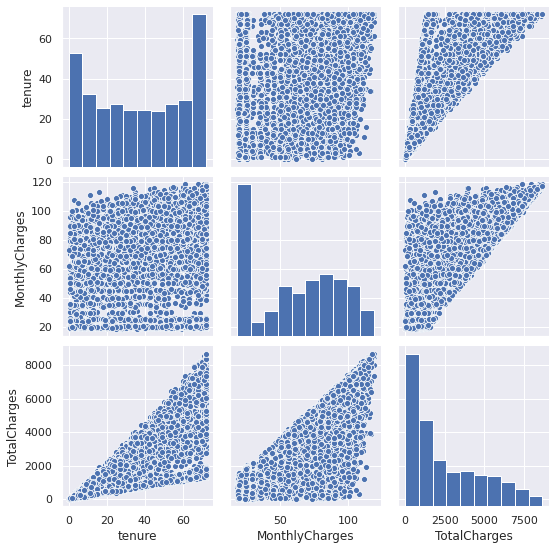

In [ ]:
sns.pairplot( df_stay.drop('SeniorCitizen', axis=1))

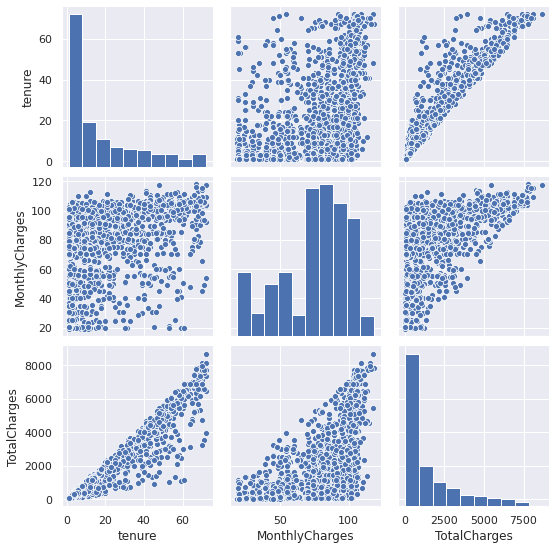

In [ ]:
sns.pairplot(df_churn.drop('SeniorCitizen', axis=1))

The Concentration of Customers
(Red = more customers, Blue = none or few)


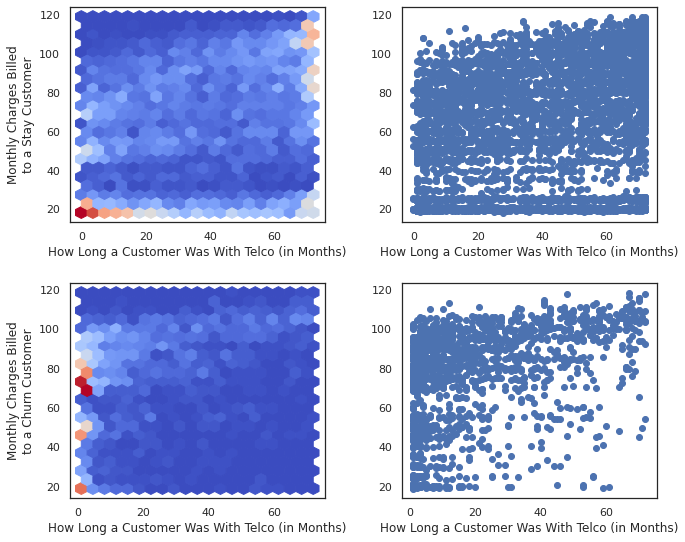

FileNotFoundError: ignored

In [12]:
sns.set(style='white')
f, ((ax_heat_s, ax_scat_s),(ax_heat, ax_scat)) = plt.subplots(nrows=2,ncols=2, figsize=(10, 8))

ax_heat_s.hexbin(x=df_stay['tenure'], y=df_stay['MonthlyCharges'], gridsize=20, cmap='coolwarm')
ax_heat_s.set(xlabel='How Long a Customer Was With Telco (in Months)', ylabel='Monthly Charges Billed\nto a Stay Customer')

ax_scat_s.scatter(x=df_stay['tenure'], y=df_stay['MonthlyCharges'])
ax_scat_s.set(xlabel='How Long a Customer Was With Telco (in Months)', ylabel='')

ax_heat.hexbin(x=df_churn['tenure'], y=df_churn['MonthlyCharges'], gridsize=20, cmap='coolwarm')
ax_heat.set(xlabel='How Long a Customer Was With Telco (in Months)', ylabel='Monthly Charges Billed\nto a Churn Customer')

ax_scat.scatter(x=df_churn['tenure'], y=df_churn['MonthlyCharges'])
ax_scat.set(xlabel='How Long a Customer Was With Telco (in Months)', ylabel='')


print('The Concentration of Customers\n(Red = more customers, Blue = none or few)')
plt.tight_layout(pad=2.0)

plt.savefig(f"{images_dir}/MonthlyCharges_v_Tenure.png")
plt.show()
files.download('MonthlyCharges_v_Tenure.png')

The Concentration of Customers
(Red = more customers, Blue = none or few)


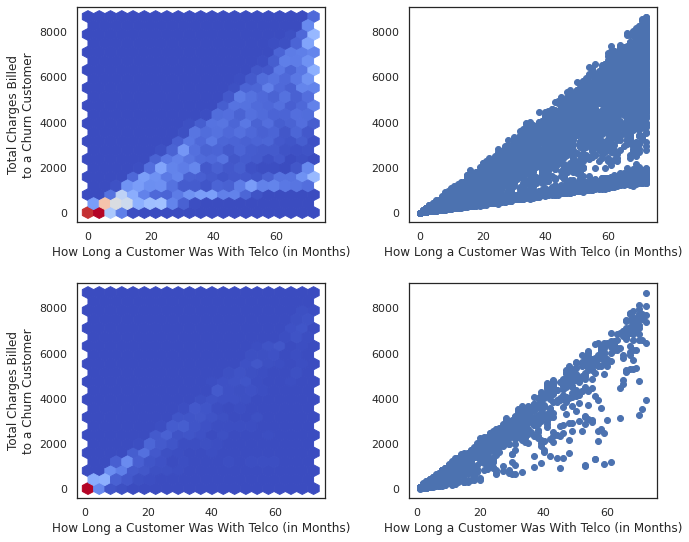

In [ ]:
f, ((ax_heat_s, ax_scat_s),(ax_heat, ax_scat)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

ax_heat_s.hexbin(x=df_stay['tenure'], y=df_stay['TotalCharges'], gridsize=20, cmap='coolwarm')
ax_heat_s.set(xlabel='How Long a Customer Was With Telco (in Months)', ylabel='Total Charges Billed\nto a Churn Customer')

ax_scat_s.scatter(x=df_stay['tenure'], y=df_stay['TotalCharges'])
ax_scat_s.set(xlabel='How Long a Customer Was With Telco (in Months)', ylabel='')

ax_heat.hexbin(x=df_churn['tenure'], y=df_churn['TotalCharges'], gridsize=20, cmap='coolwarm')
ax_heat.set(xlabel='How Long a Customer Was With Telco (in Months)', ylabel='Total Charges Billed\nto a Churn Customer')

ax_scat.scatter(x=df_churn['tenure'], y=df_churn['TotalCharges'])
ax_scat.set(xlabel='How Long a Customer Was With Telco (in Months)', ylabel='')

print('The Concentration of Customers\n(Red = more customers, Blue = none or few)')
plt.tight_layout(pad=2.0)
plt.show()

The Concentration of Customers
(Red = more customers, Blue = none or few)


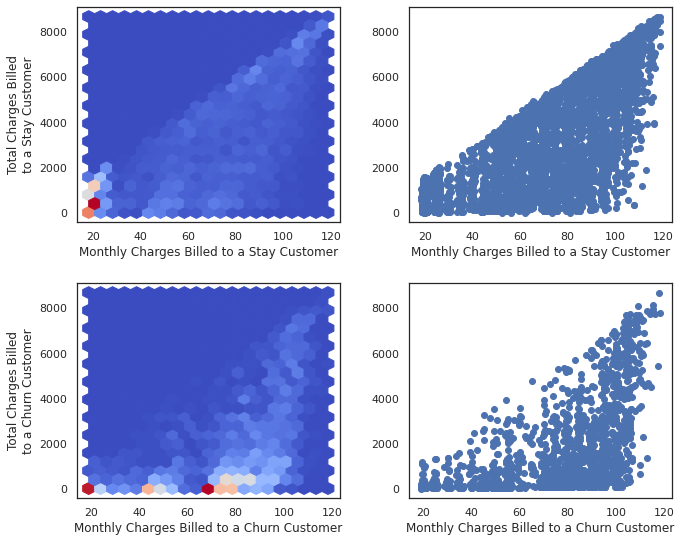

In [ ]:
f, ((ax_heat_s, ax_scat_s),(ax_heat, ax_scat)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

ax_heat_s.hexbin(x=df_stay['MonthlyCharges'], y=df_stay['TotalCharges'], gridsize=20, cmap='coolwarm')
ax_heat_s.set(xlabel='Monthly Charges Billed to a Stay Customer', ylabel='Total Charges Billed\nto a Stay Customer')

ax_scat_s.scatter(x=df_stay['MonthlyCharges'], y=df_stay['TotalCharges'])
ax_scat_s.set(xlabel='Monthly Charges Billed to a Stay Customer', ylabel='')

ax_heat.hexbin(x=df_churn['MonthlyCharges'], y=df_churn['TotalCharges'], gridsize=20, cmap='coolwarm')
ax_heat.set(xlabel='Monthly Charges Billed to a Churn Customer', ylabel='Total Charges Billed\nto a Churn Customer')

ax_scat.scatter(x=df_churn['MonthlyCharges'], y=df_churn['TotalCharges'])
ax_scat.set(xlabel='Monthly Charges Billed to a Churn Customer', ylabel='')

print('The Concentration of Customers\n(Red = more customers, Blue = none or few)')
plt.tight_layout(pad=2.0)
plt.show()

##Now I will look at the catagorical data.



gender


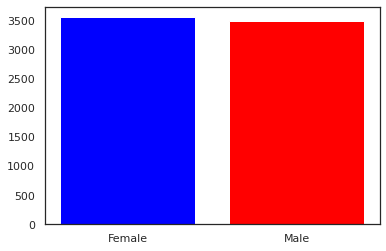



Partner


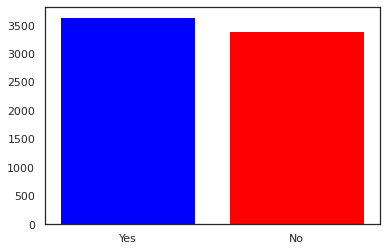



Dependents


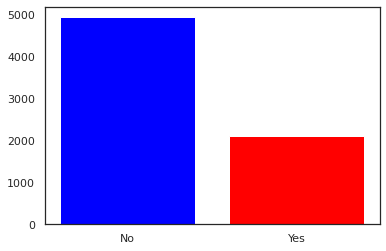



PhoneService


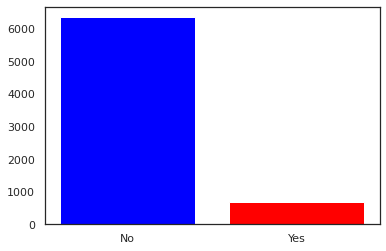



MultipleLines


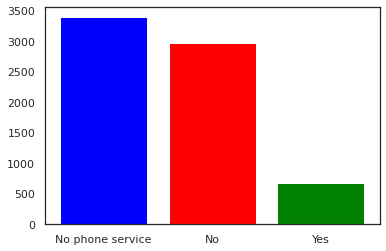



InternetService


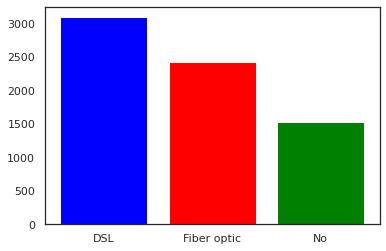



OnlineSecurity


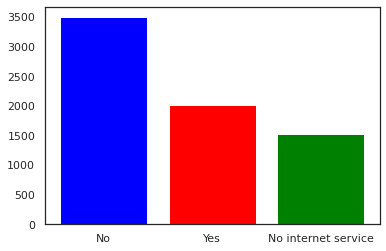



OnlineBackup


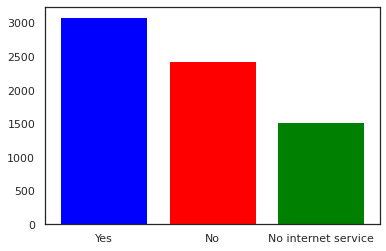



DeviceProtection


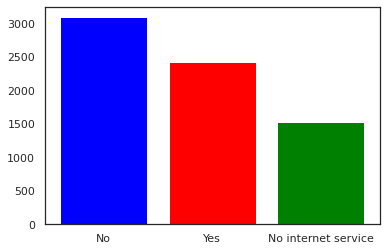



TechSupport


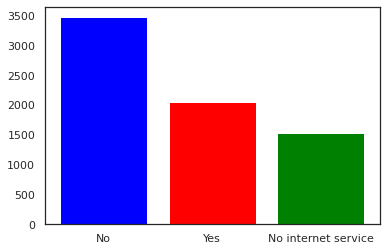



StreamingTV


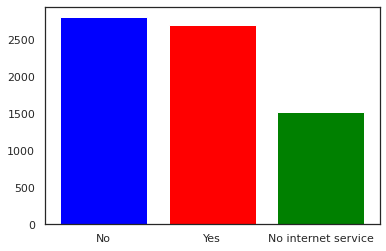



StreamingMovies


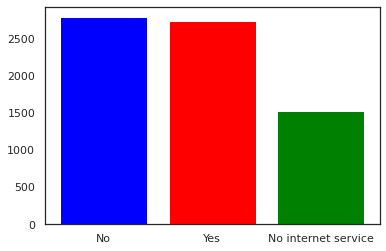



Contract


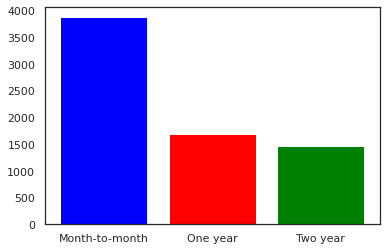



PaperlessBilling


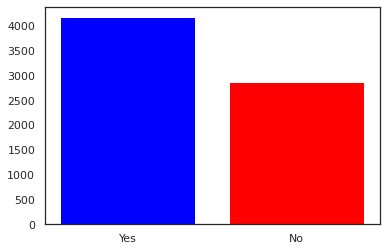



PaymentMethod


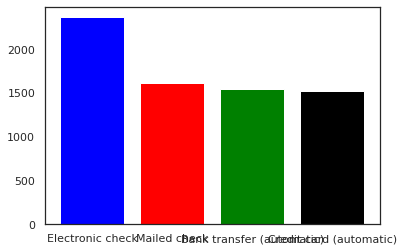



Churn


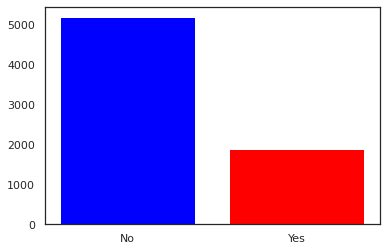

In [ ]:
df_objectcolumns = ['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
for i in df_objectcolumns:
  print('\n')
  print(i)
  values = df[i].value_counts()
  category = df[i].unique()
  plt.bar(category, values, color=[ 'blue', 'red', 'green', 'black', 'cyan'])
  plt.show()

##To better understand the relationships between different categorical features, I will produce some cross-tabulation tables.

##I see that 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', and 'StreamingMovies' all have the same number for 'no internet service'. This is something I explore more in notebook Capstone2_Logreg_and_RFC_usingselectedfeaturs where I remove all but 'InternetService' to see if eliminating the possible collinearity between the others would help make a better model.



Crosstab Heat Map for gender and Churn


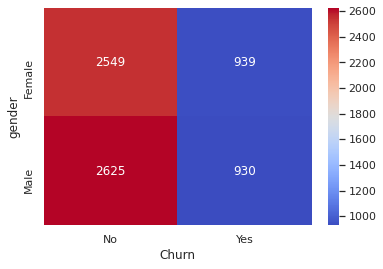



Crosstab Heat Map for Partner and Churn


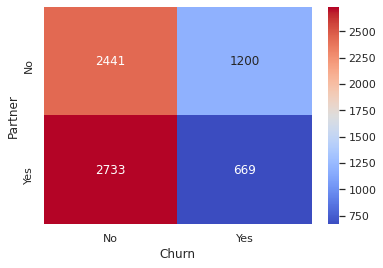



Crosstab Heat Map for Dependents and Churn


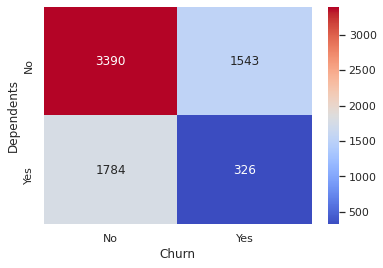



Crosstab Heat Map for PhoneService and Churn


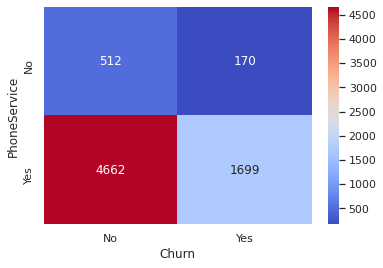



Crosstab Heat Map for MultipleLines and Churn


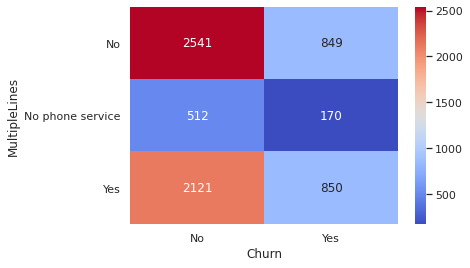



Crosstab Heat Map for InternetService and Churn


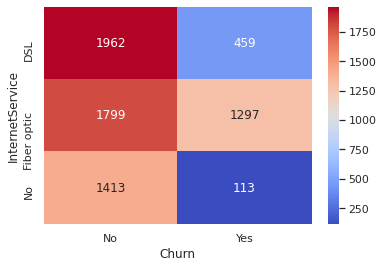



Crosstab Heat Map for OnlineSecurity and Churn


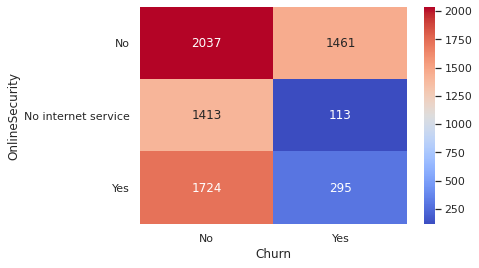



Crosstab Heat Map for OnlineBackup and Churn


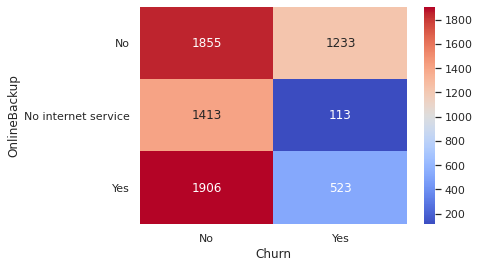



Crosstab Heat Map for DeviceProtection and Churn


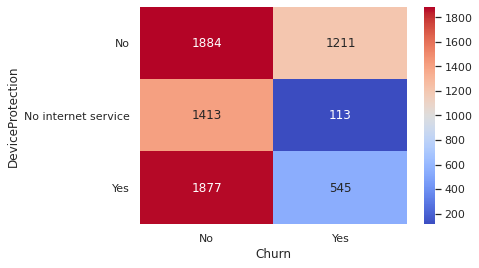



Crosstab Heat Map for TechSupport and Churn


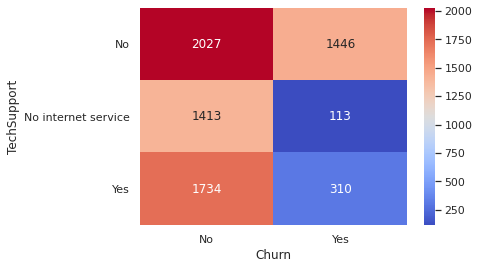



Crosstab Heat Map for StreamingTV and Churn


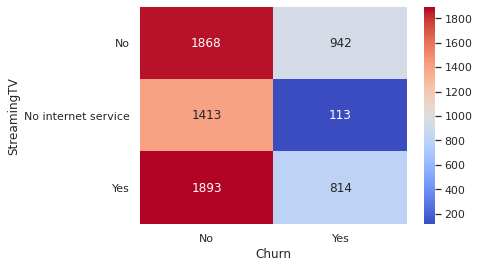



Crosstab Heat Map for StreamingMovies and Churn


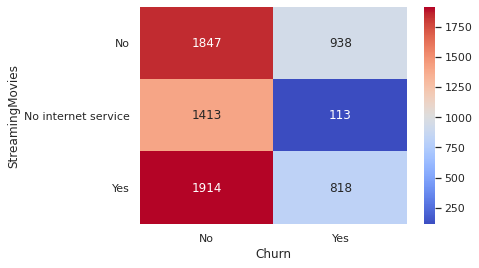



Crosstab Heat Map for Contract and Churn


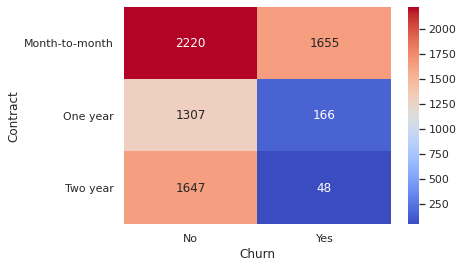



Crosstab Heat Map for PaperlessBilling and Churn


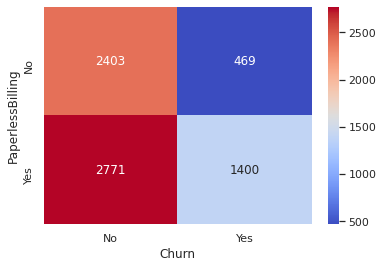



Crosstab Heat Map for PaymentMethod and Churn


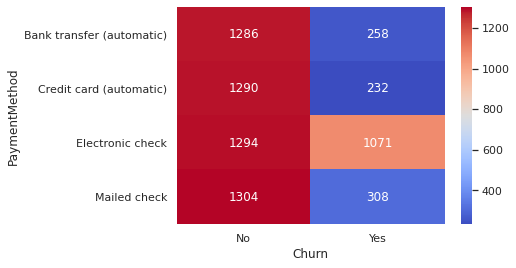

In [ ]:
df_objectcolumns_most = ['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
for i in df_objectcolumns_most:
  print('\n')
  print('Crosstab Heat Map for', i, 'and Churn')
  crosstab_formap = pd.crosstab(df[i], df.Churn)
  sns.heatmap(crosstab_formap, annot=True, cmap='coolwarm', fmt='d')
  plt.show()


------------------------------------------------

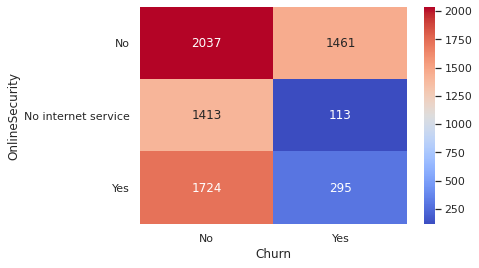

FileNotFoundError: ignored

In [14]:
crosstab_formap = pd.crosstab(df.OnlineSecurity, df.Churn)
sns.heatmap(crosstab_formap, annot=True, cmap='coolwarm', fmt='d')

plt.savefig(f"{images_dir}/heatmap_OnlineSecurity_v_Churn.png")
plt.show()
files.download('heatmap_OnlineSecurity_v_Churn.png')

##One last thing to look at. I will check the number of unique values for the costumerID. If each customer has a unique ID, then I will drop them as it appears they are random alpha-numeric combinations.

In [ ]:
customerID_unique = df['customerID'].nunique()
customerID_unique

7043

In [ ]:
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###Now I will export my new data set!

In [ ]:
df.to_csv('telcodata_posteda.csv')

from google.colab import files
files.download('telcodata_posteda.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>